## Predicting Horse Colic Survival: A Machine Learning Approach for Early Intervention
### 6/7/23

X23 Group 15 Members:
- Andrew Kassis
- Christian Vargas
- Deniz Erisgen
- Tiffany Andersen

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.animalclinicfortlupton.com/uploads/5/7/6/2/57623911/colicrxhorse-with-gi-diagram_orig.jpg")
# Animal Clinic, LLC "Colic Diagnosis" photo source  : https://www.animalclinicfortlupton.com/colic-diagnosis.html

Objective: To develop a predictive model capable of estimating the probability of survival for horses affected by colic. This project aims to provide valuable insights to veterinarians and horse owners, enabling them to make well-informed decisions regarding treatment options and care. Furthermore, the objective involves conducting an in-depth analysis to identify the most influential features or attributes for accurately predicting colic occurrences.

### Initial Exploration

In [2]:
import warnings
# Ignore the warning
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# Load the dataset and test dataset from the provided link
url = 'https://raw.githubusercontent.com/c-vargas/horse_colic_data/main/horse_colic.csv'
df = pd.read_csv(url)

url2 = 'https://raw.githubusercontent.com/c-vargas/horse_colic_data/main/horse_test_data.csv'
test = pd.read_csv(url2)

In [5]:
# Check the size of the dataset
data_size = df.shape
print("Data Size:", data_size)
test_size = test.shape
print("Test data Size:", test_size)

Data Size: (299, 28)
Test data Size: (89, 28)


In [6]:
print(df.head(10))

  surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate   
0      no  adult           530101         38.5   66.0              28.0  \
1     yes  adult           534817         39.2   88.0              20.0   
2      no  adult           530334         38.3   40.0              24.0   
3     yes  young          5290409         39.1  164.0              84.0   
4      no  adult           530255         37.3  104.0              35.0   
5      no  adult           528355          NaN    NaN               NaN   
6     yes  adult           526802         37.9   48.0              16.0   
7     yes  adult           529607          NaN   60.0               NaN   
8      no  adult           530051          NaN   80.0              36.0   
9      no  young          5299629         38.3   90.0               NaN   

  temp_of_extremities peripheral_pulse mucous_membrane capillary_refill_time   
0                cool          reduced             NaN            more_3_sec  \
1             

In [7]:
print(df.dtypes.value_counts())

object     17
float64     7
int64       4
Name: count, dtype: int64


In [8]:
# Get the types of each column
column_types = df.dtypes
print("Column Types:")
print(column_types)

Column Types:
surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object


In [9]:
# Count the number of missing values in each column
na_count = df.isnull().sum()
print("NA Values:")
print(na_count)

NA Values:
surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64


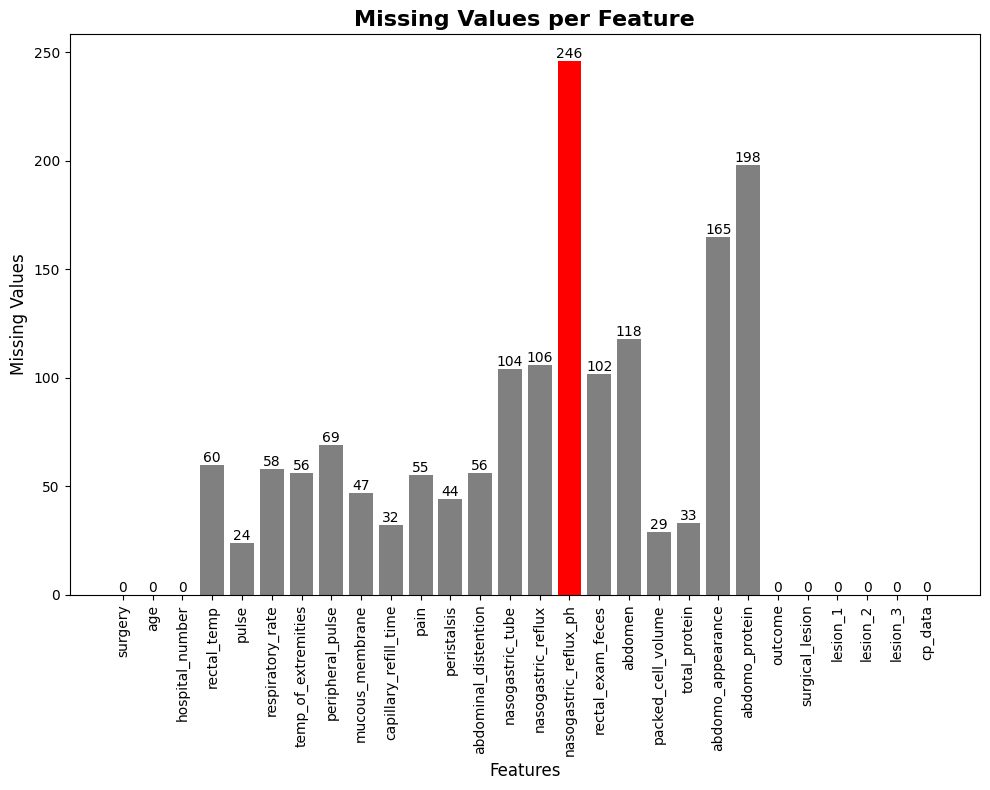

In [10]:
# Bar chart to illustrate missing values per feature
plt.figure(figsize=(10, 8))
# Customize bar colors
colors = ['red' if value == max(na_count) else 'gray' for value in na_count]
plt.bar(range(len(na_count)), na_count, color=colors)
plt.title('Missing Values per Feature', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=12)
plt.ylabel('Missing Values', fontsize=12)
# Adjust the x-ticks properties
plt.xticks(np.arange(len(df.columns)), df.columns.values, rotation='vertical', fontsize=10)
# Adjust the y-ticks properties
plt.yticks(fontsize=10)
# Adding value labels to the bars
for i, value in enumerate(na_count):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

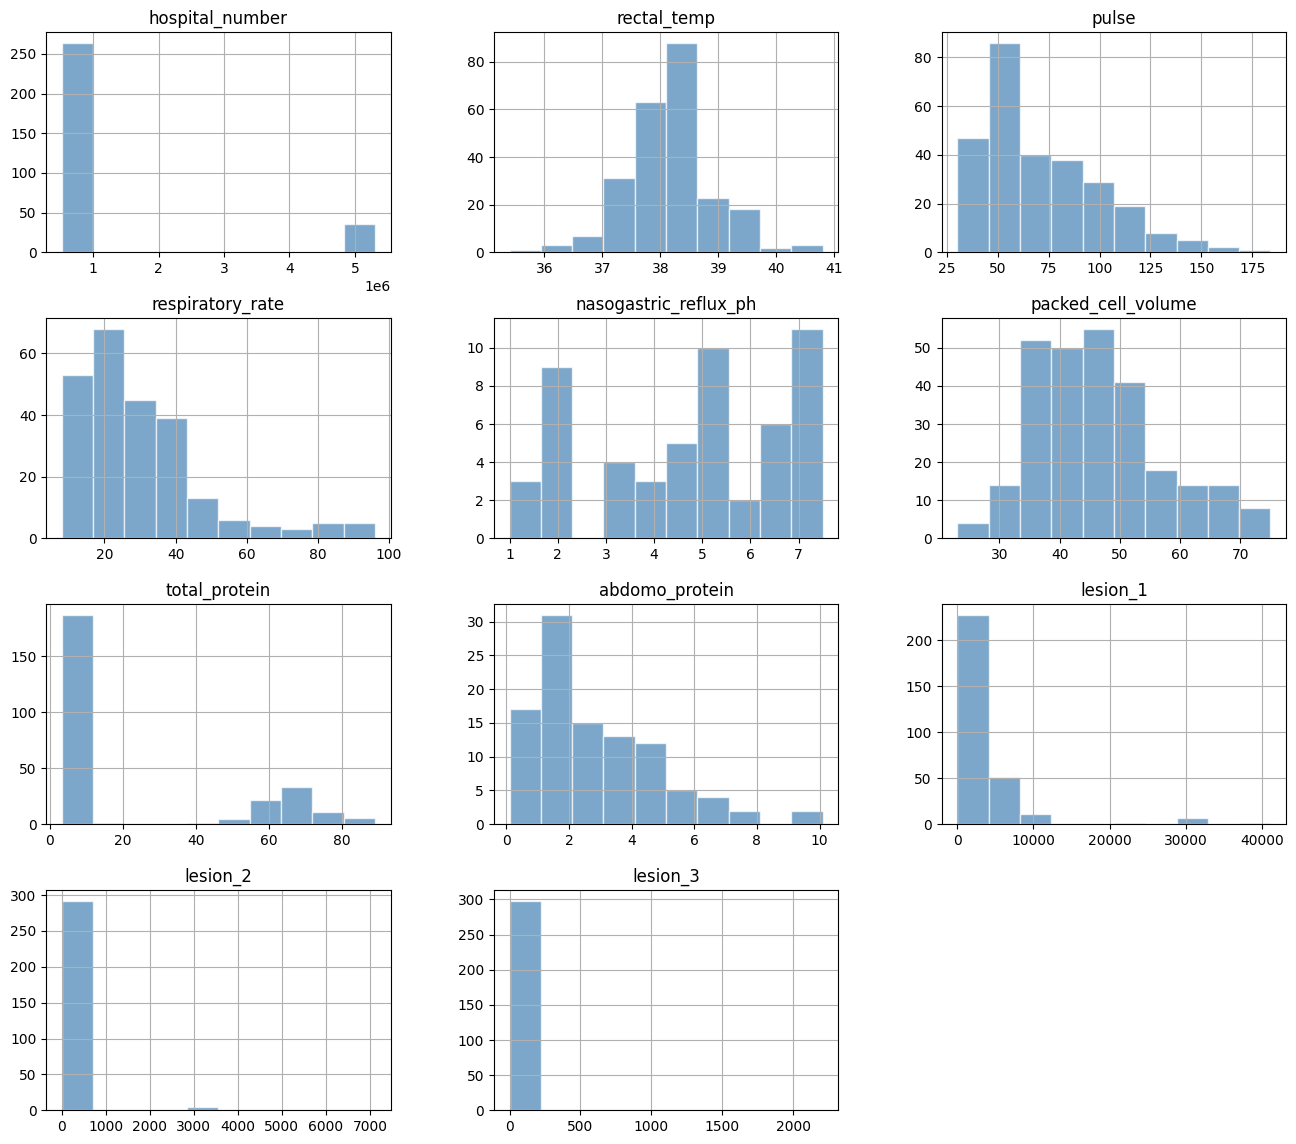

In [11]:
# Histogram representations of each column in the DataFrame
fig, ax = plt.subplots(figsize=(16, 14))
df.hist(ax=ax, color='steelblue', edgecolor='white', alpha=0.7)
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [12]:
# Check the number of missing values (NA values)
missing_values = df.isna().sum().sum()
print("Number of missing values in the dataset:", missing_values)

Number of missing values in the dataset: 1602


In [13]:
# Check for obviously bad data (e.g., outliers, unrealistic values)
print(df.describe().to_string(float_format="{:.2f}".format))

       hospital_number  rectal_temp  pulse  respiratory_rate  nasogastric_reflux_ph  packed_cell_volume  total_protein  abdomo_protein  lesion_1  lesion_2  lesion_3
count           299.00       239.00 275.00            241.00                  53.00              270.00         266.00          101.00    299.00    299.00    299.00
mean        1087732.70        38.17  72.00             30.46                   4.71               46.31          24.27            3.04   3659.71     90.53      7.39
std         1532031.58         0.73  28.65             17.67                   1.98               10.44          27.36            1.97   5408.47    650.64    127.75
min          518476.00        35.40  30.00              8.00                   1.00               23.00           3.30            0.10      0.00      0.00      0.00
25%          528904.00        37.80  48.00             18.00                   3.00               38.00           6.50            2.00   2111.50      0.00      0.00
50%       

In [14]:
# Additional information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [15]:
# Check the amount of data
data_length = len(df)
print("Number of instances in the dataset:", data_length)

Number of instances in the dataset: 299


### Initial preprocessing and cleaning

In [16]:
# Delete unecessary columns
df.drop(['hospital_number'], axis=1, inplace=True)

In [17]:
# Percentage of missing data by column:
missing_percentage = df.isnull().mean() * 100
print("Missing Percentage:")
print(missing_percentage)

Missing Percentage:
surgery                   0.000000
age                       0.000000
rectal_temp              20.066890
pulse                     8.026756
respiratory_rate         19.397993
temp_of_extremities      18.729097
peripheral_pulse         23.076923
mucous_membrane          15.719064
capillary_refill_time    10.702341
pain                     18.394649
peristalsis              14.715719
abdominal_distention     18.729097
nasogastric_tube         34.782609
nasogastric_reflux       35.451505
nasogastric_reflux_ph    82.274247
rectal_exam_feces        34.113712
abdomen                  39.464883
packed_cell_volume        9.698997
total_protein            11.036789
abdomo_appearance        55.183946
abdomo_protein           66.220736
outcome                   0.000000
surgical_lesion           0.000000
lesion_1                  0.000000
lesion_2                  0.000000
lesion_3                  0.000000
cp_data                   0.000000
dtype: float64


In [18]:
# Remove columns with lots of missing data (threshold at 60%)
threshold = 50
columns_to_drop = df.columns[missing_percentage > threshold]
df.drop(columns_to_drop, axis=1, inplace = True)

In [19]:
# Remove columns that are useless or irrelevant
# columns_to_drop = ['useless_column', 'irrelevant_column']
# df = df.drop(columns_to_drop, axis=1)

In [20]:
# Remove other missing data:
# df = df.dropna()  # Remove rows with any missing values

### Exploration and Visualization

In [21]:
print("\nCount values:")
print(df['outcome'].value_counts())


Count values:
outcome
lived         178
died           77
euthanized     44
Name: count, dtype: int64


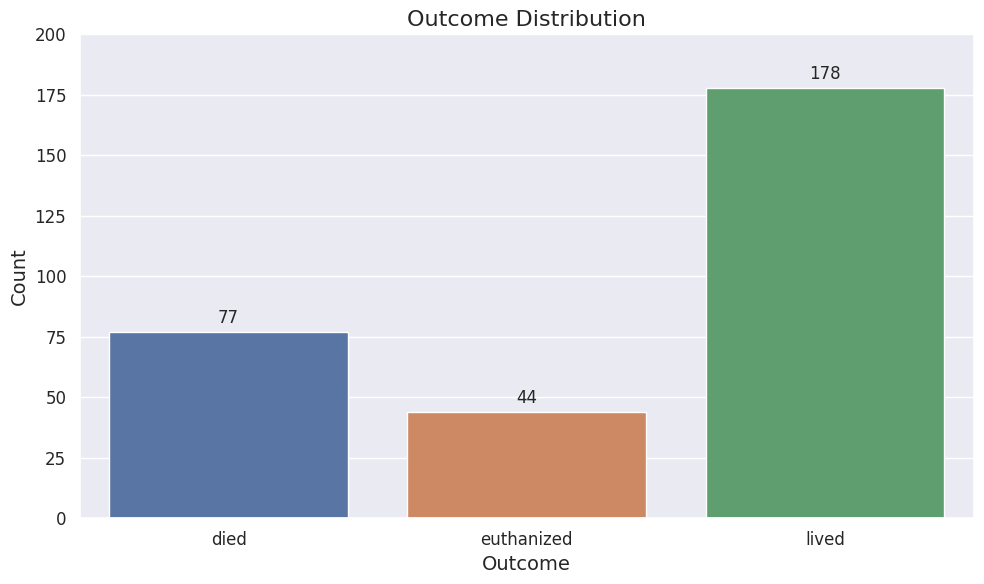

In [22]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='outcome')
# Add count labels above each bar
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.xlabel('Outcome', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Outcome Distribution', fontsize=16)
plt.ylim(0, 200)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [23]:
print(df.outcome.value_counts())

outcome
lived         178
died           77
euthanized     44
Name: count, dtype: int64


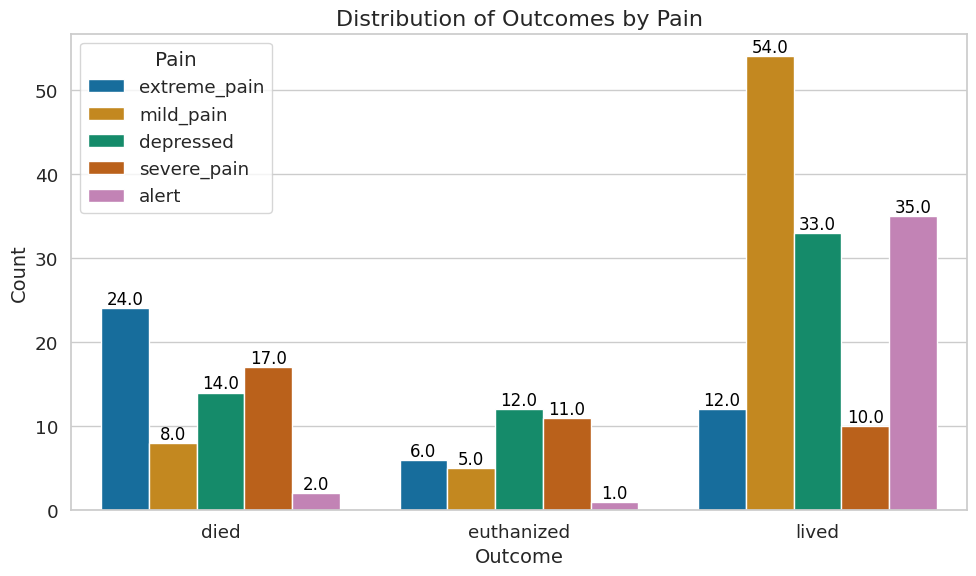

In [24]:
# Figure showing that horses exhibiting the highest symptoms of extreme pain, severe pain, and depression ultimately died.
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='outcome', hue='pain', palette='colorblind')
ax.set_xlabel('Outcome', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.set_title('Distribution of Outcomes by Pain', fontsize=16)
ax.legend(title='Pain', loc='upper left')
# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center',
                va='bottom', fontsize=12, color='black')

plt.tight_layout()
plt.show()

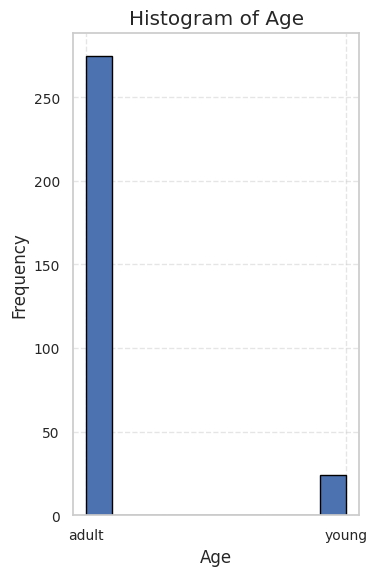

In [25]:
# Histograms of single numeric value (age of horse)
plt.figure(figsize=(4, 6))
plt.hist(df['age'], bins='auto', edgecolor='black')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Histogram of Age')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

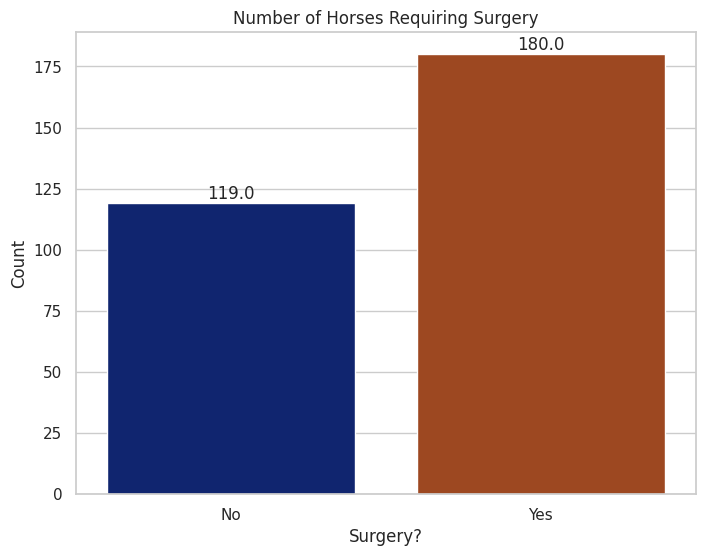

In [26]:
# Bar plots of value counts of single categorical variable (surgery)
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='surgery', data=df, palette='dark')
plt.xlabel('Surgery?')
plt.ylabel('Count')
plt.title('Number of Horses Requiring Surgery')
plt.xticks([0, 1], ['No', 'Yes'])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
plt.show()

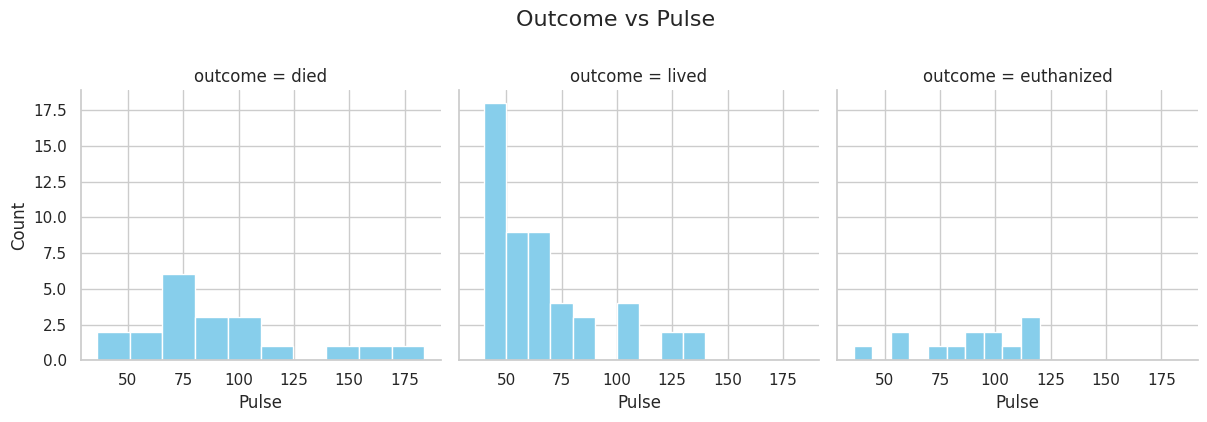

In [27]:
# Subplots indicating that horses that died had a pulse of around 70 bpm, while
# horses that lived had the highest pulse count at approximately 40 bpm.
sns.set(style="whitegrid")
facet_grid = sns.FacetGrid(data=test, col='outcome', margin_titles=True, height=4)
facet_grid .map(plt.hist, 'pulse', bins=10, color='skyblue', edgecolor='white')
plt.subplots_adjust(top=0.85)
facet_grid.fig.suptitle('Outcome vs Pulse', fontsize=16, y=1.05)
facet_grid.set_axis_labels('Pulse', 'Count')
plt.show()

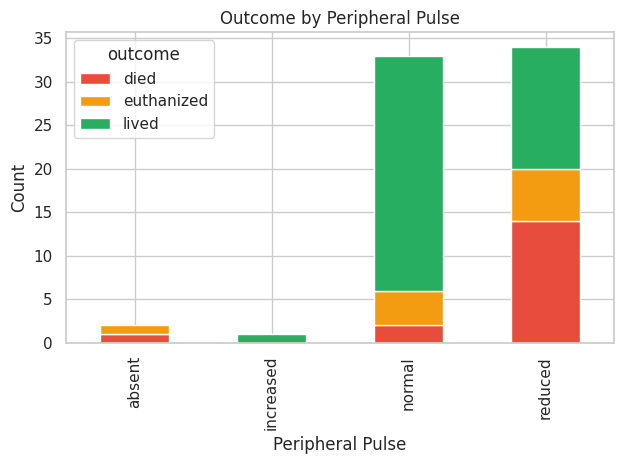

In [28]:
# Pivot table to count the occurrences of each peripheral pulse by outcome
sns.set(style="whitegrid")
pivot_table = test.pivot_table(index='peripheral_pulse', columns='outcome', aggfunc='size', fill_value=0)
# Reorder columns based on outcome categories
pivot_table = pivot_table[['died', 'euthanized', 'lived']]
ax = pivot_table.plot(kind='bar', stacked=True, color=['#E74C3C', '#F39C12', '#27AE60'])
ax.set_title('Outcome by Peripheral Pulse')
ax.set_xlabel('Peripheral Pulse')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()